In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the csv files
df_city_data = "data/city_data.csv"
df_ride_data = "data/ride_data.csv"

# Read the data from the csv using pandas
city_data = pd.read_csv(df_city_data)
ride_data = pd.read_csv(df_ride_data)

# merge the city data and ride data data frames into a single dataset
city_ride_data = pd.merge(ride_data, city_data, how="left", on=["city", "city"])

# Display the data table for preview

city_ride_data.head()
#city_date.head()

import os
cwd = os.getcwd()
print(cwd)


D:\deym\GWU_Boot Camp\Homework-5-Matplotlib\05-Matplotlib\Pyber


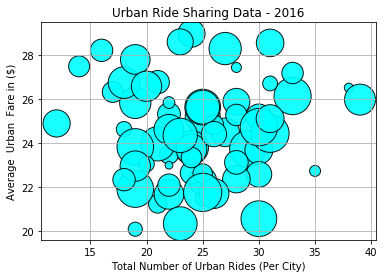

In [2]:
#- Set values for urban rides
#-Find all the Urban cities
urban_cities = city_ride_data[city_ride_data["type"] == "Urban"]
#-Count the NUmber rides in the urban cities
urban_ride_count = urban_cities.groupby(["city"]).count()["ride_id"]
#-Calculate the average fair where city type is urban 
urban_avg_fare = urban_cities.groupby(["city"]).mean()["fare"]
#-FInd the number of driveers in the urban cities
urban_driver_count = urban_cities.groupby(["city"]).mean()["driver_count"]

#-Plot a scatter plot for all above variables  for Suburban Cities
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=20*urban_driver_count, c="cyan", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.9, label="Urban")
# Incorporate the other graph properties
plt.title("Urban Ride Sharing Data - 2016")
plt.ylabel("Average  Urban  Fare in ($)")
plt.xlabel("Total Number of Urban Rides (Per City)")
plt.grid(True)


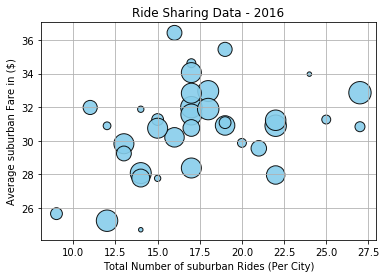

In [3]:


#- Set values for suburban rides
#Find all the suburban cities
suburban_cities = city_ride_data[city_ride_data["type"] == "Suburban"]
#-Count the NUmber rides in the suburban cities
suburban_ride_count = suburban_cities.groupby(["city"]).count()["ride_id"]
#-Calculate the average fair where city type is urban 
suburban_avg_fare = suburban_cities.groupby(["city"]).mean()["fare"]
#-FInd the number of driveers in the urban cities
suburban_driver_count = suburban_cities.groupby(["city"]).mean()["driver_count"]
#-Plot a scatter plot for all above variables  for Suburban Cities
plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s=20*suburban_driver_count, c="skyblue", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.9, label="Suburban")
# Incorporate the other graph properties
plt.title("Ride Sharing Data - 2016")
plt.ylabel("Average suburban Fare in ($)")
plt.xlabel("Total Number of suburban Rides (Per City)")
plt.grid(True)


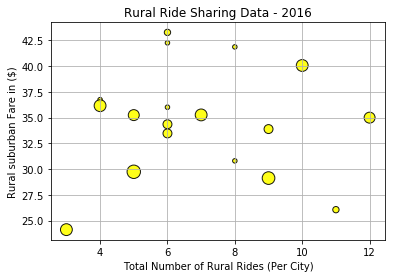

In [4]:

#- Set values for rural rides
#-Find all the rural areas
rural_cities = city_ride_data[city_ride_data["type"] == "Rural"]
#-Count the NUmber rides in the rural areas
rural_ride_count = rural_cities.groupby(["city"]).count()["ride_id"]
#-Calculate the average fair where city type is urban 
rural_avg_fare = rural_cities.groupby(["city"]).mean()["fare"]
#-FInd the number of driveers in the urban cities
rural_driver_count = rural_cities.groupby(["city"]).mean()["driver_count"]
plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s=20*rural_driver_count, c="yellow", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.9, label="Rural")
# Incorporate the other graph properties
plt.title("Rural Ride Sharing Data - 2016")
plt.ylabel("Rural suburban Fare in ($)")
plt.xlabel("Total Number of Rural Rides (Per City)")
plt.grid(True)


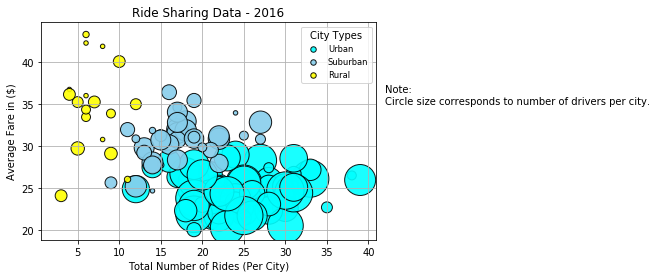

In [6]:
# Build a single scatter plots for all city types
#-Plot a scatter plot for all above variables  for Suburban Cities
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=20*urban_driver_count, c="cyan", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.9, label="Urban")
#-Plot a scatter plot for all above variables  for Suburban Cities
plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s=20*suburban_driver_count, c="skyblue", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.9, label="Suburban")
#-Plot a scatter plot for all above variables  for rural areas
plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s=20*rural_driver_count, c="yellow", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.9, label="Rural")
# Incorporate the other graph properties
plt.title("Ride Sharing Data - 2016")
plt.ylabel("Average Fare in ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="best", title="City Types", 
                  labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42, 35, "Note:\nCircle size corresponds to number of drivers per city.")

# Save Figure
plt.savefig("analysis/pyber_driver_counut_scatterPlot.png")

# Show plot
plt.show()


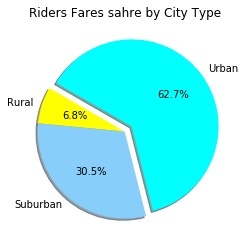

In [8]:
# Calculate fare_share_percents_by_cityTyp 
fare_share_percents_by_cityType = 100 * city_ride_data.groupby(["type"]).sum()["fare"] / city_ride_data["fare"].sum()

# Build Pie Chart by fare_share_percents_by_cityTyp
plt.pie(fare_share_percents_by_cityType, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["yellow", "lightskyblue", "cyan"], 
        explode=[0, 0, 0.1], 
        autopct='%1.1f%%', 
        shadow=True, startangle=150)
plt.title("Riders Fares sahre by City Type")

# Save pie chart as figure
plt.savefig("analysis/fare_share_percents_by_cityType.png")

# Show Figure
plt.show()

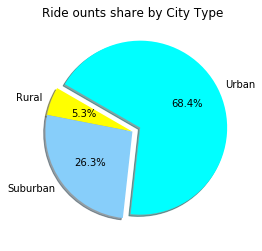

In [11]:
# Calculate Ride Percents
ride_count_percents = 100 * city_ride_data.groupby(["type"]).count()["ride_id"] / city_ride_data["ride_id"].count()

# Build Pie Chart  by ridew_count_share
plt.pie(ride_count_percents, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["yellow", "lightskyblue", "cyan"],
        explode=[0, 0, 0.1], 
        autopct='%1.1f%%', 
        shadow=True, startangle=150)
plt.title("Ride ounts share by City Type")

# Save pie chart as figure
plt.savefig("analysis/ride_count_share.png")

# Show Figure
plt.show()

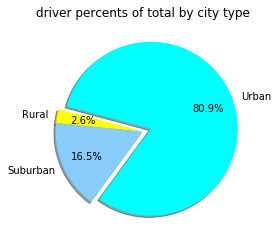

In [12]:
# Calculate percentage of drivers by city type
driver_percents_by_city_type = 100 * city_data.groupby(["type"]).sum()["driver_count"] / city_data["driver_count"].sum()

# Build Pie Charts
plt.pie(driver_percents_by_city_type, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["yellow", "lightskyblue", "cyan"],
        explode=[0, 0, 0.1], 
        autopct='%1.1f%%', pctdistance=0.70,
        shadow=True, startangle=165)
plt.title("driver percents of total by city type")


# Save pie chart as figurelysis/Fig4.png")
plt.savefig("analysis/driver_percents_by_city_type.png")

# Show Figure
plt.show()